# Clustering

## K-means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster

(24, 2)


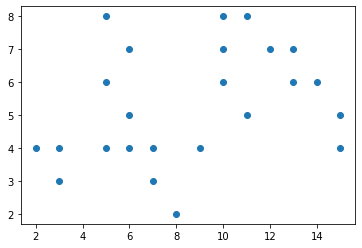

In [2]:
X = np.array([
    [2, 4],
    [3, 4],
    [3, 3],
    [5, 8],
    [5, 6],
    [5, 4],
    [6, 7],
    [6, 5],
    [6, 4],
    [7, 4],
    [7, 3],
    [8, 2],
    [9, 4],
    [10, 8],
    [10, 7],
    [10, 6],
    [11, 8],
    [11, 5],
    [12, 7],
    [13, 7],
    [13, 6],
    [14, 6],
    [15, 5],
    [15, 4],
])
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
k = 2
initial_centers = np.array([[5, 4], [12, 6]])

Initialization complete
Iteration 0, inertia 141.0
Iteration 1, inertia 137.08333333333334
Converged at iteration 1: strict convergence.


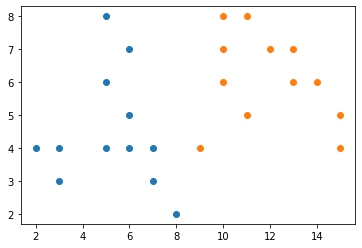

In [4]:
kmeans = cluster.KMeans(k, init=initial_centers, n_init=1, verbose=True)
kmeans.fit(X)
labels = kmeans.labels_
l0 = X[np.argwhere(labels == 0).flatten()]
l1 = X[np.argwhere(labels == 1).flatten()]
plt.scatter(l0[:,0], l0[:,1])
plt.scatter(l1[:,0], l1[:,1])
plt.show()